## Actualización GitHub

git add .
git commit -m "Actualizo documentación"
git push


## Importación de librerías necesarias

In [28]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y modelos
from sklearn.preprocessing import (
    LabelEncoder, OrdinalEncoder, OneHotEncoder,
    MinMaxScaler, StandardScaler, PowerTransformer
)
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import (
    mean_absolute_error, r2_score,
    accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
)
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier

# Visualizaciones por defecto
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 200)



##  1. CARGA DEL DATASET + REVISIÓN INICIAL

In [29]:
ruta= "C:/Users/lamas/Documents/Ejercicios/Prácticas/bmw_pricing_v3 (1).csv"

In [30]:
df_bmw= pd.read_csv(ruta)

In [31]:
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [32]:
df_bmw.tail()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4838,BMW,218 Gran Tourer,39743.0,110.0,NaN,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01
4839,BMW,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,NaN,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01
4840,BMW,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,NaN,False,False,True,True,17000.0,2018-09-01
4841,BMW,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2018-09-01
4842,BMW,525,195840.0,160.0,NaN,diesel,grey,NaN,True,NaN,False,NaN,True,False,True,True,15500.0,2018-09-01


In [33]:
df_bmw.shape

(4843, 18)

In [34]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [35]:
df_bmw.describe().T

,count,mean,std,min,25%,50%,75%,max
km,4841.0,140959.347862,60208.534313,-64.0,102884.0,141080.0,175217.0,1000376.0
potencia,4842.0,128.981826,38.994839,0.0,100.0,120.0,135.0,423.0
precio,4837.0,15831.920612,9222.630708,100.0,10800.0,14200.0,18600.0,178500.0


In [36]:
df_bmw.duplicated().sum()

np.int64(0)

In [37]:
# Mostrar duplicados (completos)
df_bmw[df_bmw.duplicated(keep=False)].sort_values(by=list(df_bmw.columns)).head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


## Pregunta 1

In [38]:
#Detección de nulos
(df_bmw.isnull().sum()/len(df_bmw))*100

marca                          20.028908
modelo                          0.061945
km                              0.041297
potencia                        0.020648
fecha_registro                 50.030973
tipo_gasolina                   0.103242
color                           9.188520
tipo_coche                     30.146603
volante_regulable               0.082593
aire_acondicionado             10.035102
camara_trasera                  0.041297
asientos_traseros_plegables    70.018584
elevalunas_electrico            0.041297
bluetooth                      15.032005
gps                             0.000000
alerta_lim_velocidad           15.032005
precio                          0.123890
fecha_venta                     0.020648
dtype: float64

En este caso, observamos que la columna "asientos_traseros_plegables" tiene un porcentaje altísimo de nulos (70%), al igual que la "fecha_registro" que tiene un 50% de valores nulos. Vamos a eliminar ambas generando una nueva variable agrupe las variables con un porcentaje de nulos mayor al 50%. Además, la columna capacidad_deposito cuenta con 100% de valores nulos.

In [39]:
cols = df_bmw.columns[df_bmw.isnull().mean() > 0.5]
cols

Index(['fecha_registro', 'asientos_traseros_plegables'], dtype='object')

In [40]:
#Eliminamos
df_bmw.drop(columns=cols, inplace=True)

In [41]:
del(df_bmw["capacidad_deposito"])

KeyError: 'capacidad_deposito'

In [ ]:
#Revisar valores incoherentes
df_bmw.loc[df_bmw["tipo_gasolina"] == "Eléctrico", "capacidad_deposito"] = 0

## Pregunta 2

In [64]:
(df_bmw.isnull().sum()/len(df_bmw))*100

marca                   0.000000
modelo                  0.062022
km                      0.041348
potencia                0.020674
tipo_gasolina           0.103370
color                   0.000000
tipo_coche              0.000000
volante_regulable       0.082696
aire_acondicionado      0.000000
camara_trasera          0.041348
elevalunas_electrico    0.041348
bluetooth               0.000000
gps                     0.000000
alerta_lim_velocidad    0.000000
precio                  0.000000
fecha_venta             0.020674
dtype: float64

In [45]:
#Eliminar nulos del target. En el caso del precio, al tener un porcentaje bajo de nulos, se opta por eliminar las filas con nulos en esta columna
df_bmw.dropna(subset=["precio"], inplace=True)

In [ ]:
# Fecha_registro, tiene un impotante numero de nulos, pero no es relevante para el análisis, se elimina
df_bmw.drop(columns=["fecha_registro"], inplace=True)

In [48]:
#tipo_coche tiene nulos, pero es relevante, se imputa con la moda
df_bmw["tipo_coche"].fillna(df_bmw["tipo_coche"].mode()[0], inplace=True)

In [50]:
#marca tiene nulos, pero es relevante, se imputa con la moda
df_bmw["marca"].fillna(df_bmw["marca"].mode()[0], inplace=True)

In [54]:
#bluetooth tiene nulos, se imputa con la moda
df_bmw["bluetooth"].fillna(df_bmw["bluetooth"].mode()[0], inplace=True)

In [58]:
#alerta_lim_velocidad  tiene nulos, se imputa con la moda  
df_bmw["alerta_lim_velocidad"].fillna(df_bmw["alerta_lim_velocidad"].mode()[0], inplace=True)

In [60]:
#aire_acondicionado tiene nulos, se imputa con la moda
df_bmw["aire_acondicionado"].fillna(df_bmw["aire_acondicionado"].mode()[0], inplace=True)

In [63]:
#color tiene nulos, se imputa con la moda
df_bmw["color"].fillna(df_bmw["color"].mode()[0], inplace=True)

In [65]:
df_bmw.isnull().sum()

marca                   0
modelo                  3
km                      2
potencia                1
tipo_gasolina           5
color                   0
tipo_coche              0
volante_regulable       4
aire_acondicionado      0
camara_trasera          2
elevalunas_electrico    2
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
fecha_venta             1
dtype: int64

In [66]:
#eliminamos los nulos restantes
df_bmw.dropna(inplace=True)

In [67]:
df_bmw.isnull().sum()

marca                   0
modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
fecha_venta             0
dtype: int64

In [68]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   marca                 4817 non-null   object 
 1   modelo                4817 non-null   object 
 2   km                    4817 non-null   float64
 3   potencia              4817 non-null   float64
 4   tipo_gasolina         4817 non-null   object 
 5   color                 4817 non-null   object 
 6   tipo_coche            4817 non-null   object 
 7   volante_regulable     4817 non-null   object 
 8   aire_acondicionado    4817 non-null   bool   
 9   camara_trasera        4817 non-null   object 
 10  elevalunas_electrico  4817 non-null   object 
 11  bluetooth             4817 non-null   bool   
 12  gps                   4817 non-null   bool   
 13  alerta_lim_velocidad  4817 non-null   bool   
 14  precio                4817 non-null   float64
 15  fecha_venta           4817

## Pregunta 3

In [93]:
# Bucle para detectar cada uno de los tipos de variables
def identificador_tipos(df, target=[]):
    numericas = []
    booleanas = []
    categoricas = []
    for col in df.columns:
        kind = df[col].dtype.kind
        if col in target:
            continue
        if kind in ('i','f'):
            unique = df[col].nunique(dropna=False)
            if unique == 2:
                booleanas.append(col)
            else:
                numericas.append(col)
        else:
            categoricas.append(col)
    return numericas, booleanas, categoricas

num_cols, bool_cols, cat_cols = identificador_tipos(df_bmw, target=['precio'] if 'precio' in df_bmw.columns else [])
print("Num:", num_cols)
print("Bool:", bool_cols)
print("Cat:", cat_cols)



Num: ['km', 'potencia', 'precio_log']
Bool: []
Cat: ['marca', 'modelo', 'tipo_gasolina', 'color', 'tipo_coche', 'volante_regulable', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad', 'fecha_venta']


### Análisis variables categóricas

In [70]:
#Analisis de las variables categoricas
df_bmw.describe(include="object").T

,count,unique,top,freq
marca,4817,1,BMW,4817
modelo,4817,76,320,747
tipo_gasolina,4817,5,diesel,4610
color,4817,10,black,1931
tipo_coche,4817,8,estate,2546
volante_regulable,4817,2,True,2651
camara_trasera,4817,2,False,3847
elevalunas_electrico,4817,2,False,2598
fecha_venta,4817,13,2018-05-01,808


In [87]:
#Análisis de la variable "tipo_gasolina"
df_bmw["tipo_gasolina"].value_counts(normalize=True)*100

tipo_gasolina
diesel    95.805648
petrol     3.965947
other      0.228405
Name: proportion, dtype: float64

In [84]:
#Unificar categorias de "tipo_gasolina"
df_bmw["tipo_gasolina"] = df_bmw["tipo_gasolina"].replace({"Diesel": "diesel"})

C:\Users\lamas\AppData\Local\Temp\ipykernel_14752\2978244192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw["tipo_gasolina"] = df_bmw["tipo_gasolina"].replace({"Diesel": "diesel"})


In [86]:
#Subistituir  "hybrid_petrol" y "electro" por "other"
df_bmw["tipo_gasolina"] = df_bmw["tipo_gasolina"].replace({"hybrid_petrol": "other", "electro": "other"})

C:\Users\lamas\AppData\Local\Temp\ipykernel_14752\2105673826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw["tipo_gasolina"] = df_bmw["tipo_gasolina"].replace({"hybrid_petrol": "other", "electro": "other"})


In [88]:
df_bmw["color"].value_counts(normalize=True)*100

color
black     40.074751
grey      22.155316
blue      13.351329
white      9.966777
brown      6.270764
silver     6.021595
red        0.975914
beige      0.768272
green      0.290698
orange     0.124585
Name: proportion, dtype: float64

In [89]:
df_bmw["modelo"].value_counts(normalize=True)*100

modelo
320                  15.510797
520                  13.081395
318                  11.669435
X3                    9.073920
116                   7.433555
X1                    5.689369
316                   4.838040
X5                    4.796512
525                   3.779070
530                   3.259967
118                   2.969269
318 Gran Turismo      2.014120
320 Gran Turismo      1.515781
518                   1.370432
X4                    0.955150
535                   0.934385
X6                    0.913621
420                   0.872093
120                   0.747508
330                   0.685216
420 Gran Coupé        0.685216
730                   0.685216
520 Gran Turismo      0.477575
325                   0.394518
530 Gran Turismo      0.373754
640 Gran Coupé        0.373754
740                   0.373754
X5 M                  0.352990
114                   0.311462
218 Active Tourer     0.269934
M550                  0.249169
218                   0.249169
2

In [90]:
df_bmw["tipo_coche"].value_counts(normalize=True)*100

tipo_coche
estate         52.865449
sedan          17.026578
suv            15.656146
hatchback      10.132890
subcompact      1.598837
coupe           1.515781
convertible     0.622924
van             0.581395
Name: proportion, dtype: float64

### Análisis variables numéricas

In [71]:
#Analisis variables numericas
df_bmw.describe().T

,count,mean,std,min,25%,50%,75%,max
km,4817.0,140935.261574,60242.684349,-64.0,102758.0,140991.0,175235.0,1000376.0
potencia,4817.0,128.984845,39.004876,0.0,100.0,120.0,135.0,423.0
precio,4817.0,15841.831015,9223.064638,100.0,10900.0,14200.0,18600.0,178500.0


In [76]:
#Análisis variable "km"
df_bmw[df_bmw["km"]<0]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
2938,BMW,640 Gran Coupé,-64.0,230.0,diesel,black,sedan,True,True,False,False,False,True,True,75000.0,2018-04-01


In [77]:
#eliminar valores negativos de "km"
df_bmw= df_bmw[df_bmw["km"]>=0]

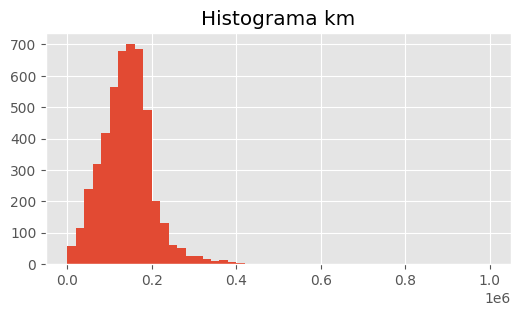

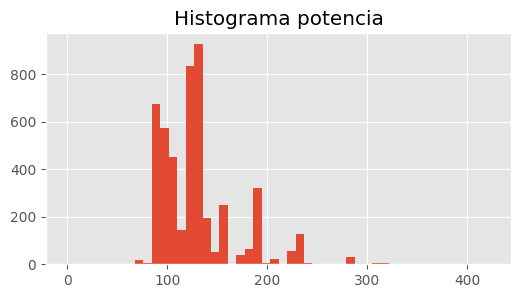

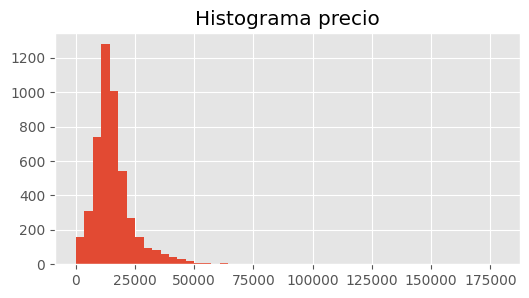

In [78]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    plt.hist(df_bmw[col].dropna(), bins=50)
    plt.title(f'Histograma {col}')
    plt.show()



In [81]:
#Suavizar valor del precio con el logaritmo
df_bmw["precio_log"] = np.log1p(df_bmw["precio"])

C:\Users\lamas\AppData\Local\Temp\ipykernel_14752\2804172343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw["precio_log"] = np.log1p(df_bmw["precio"])


<Axes: >

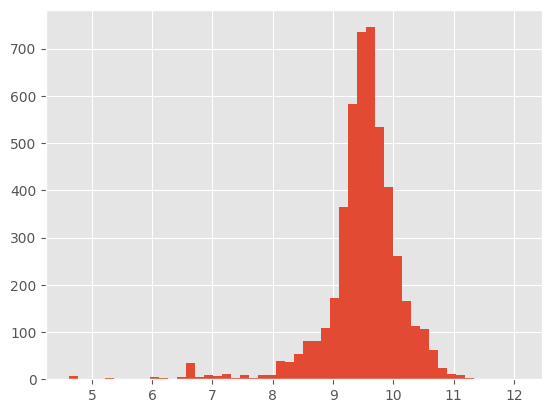

In [82]:
df_bmw.precio_log.hist(bins=50)

## Pregunta 4

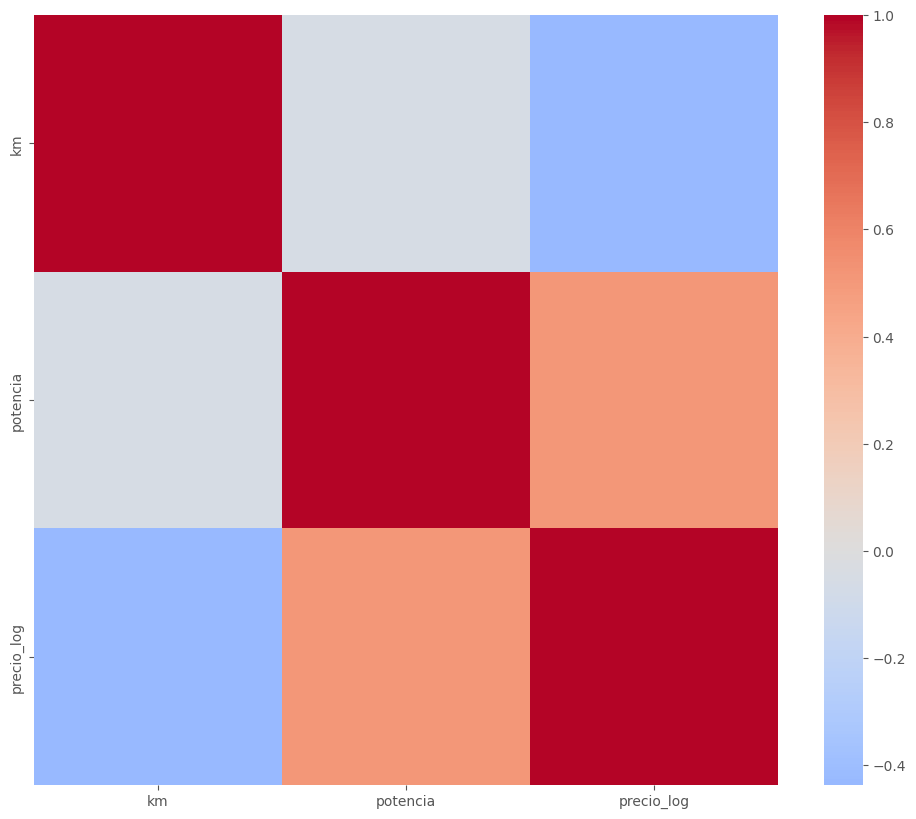

In [94]:
# Análisis correlación entre variables numéricas
corr = df_bmw[num_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.show()

## Pregunta 6

In [ ]:
#Transformar variables categoricas a numericas, fecha_venta
df_bmw["fecha_venta"] = pd.to_datetime(df_bmw["fecha_venta"])